# 🩺 Multiclass Diabetes Classification using Logistic Regression
This notebook predicts diabetes types using patient clinical parameters such as BMI, cholesterol, HbA1c, etc.  
The project includes exploratory data analysis, multicollinearity check (VIF), feature scaling, and model evaluation.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
df=pd.read_csv("Multiclass_Diabetes_dataset.csv")
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.shape)
print(df.head())
print(df.describe().T)

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64
0
(264, 12)
   Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  Class
0       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0
1       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0      0
2       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0      0
3       0   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4  21.0      0
4       0   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6  24.0      0
        count       mean        std   min     25%   50%     75%     max
Gender  264.0   0.545455   0.498875   0.0   0.000   1.0   1.000    1.00
AGE     264.0  49.522727  10.127301  25.0  43.000  50.0  55.250   77.00
Urea    264.0   5.671515   4.002837   1.1   3.600   4.7   6.100   26.40
Cr      264.0  85.806818  99.400047   6.0  46.000  61.0  82.250  800.00
HbA1c   264.0   6.862727   2.544604   0

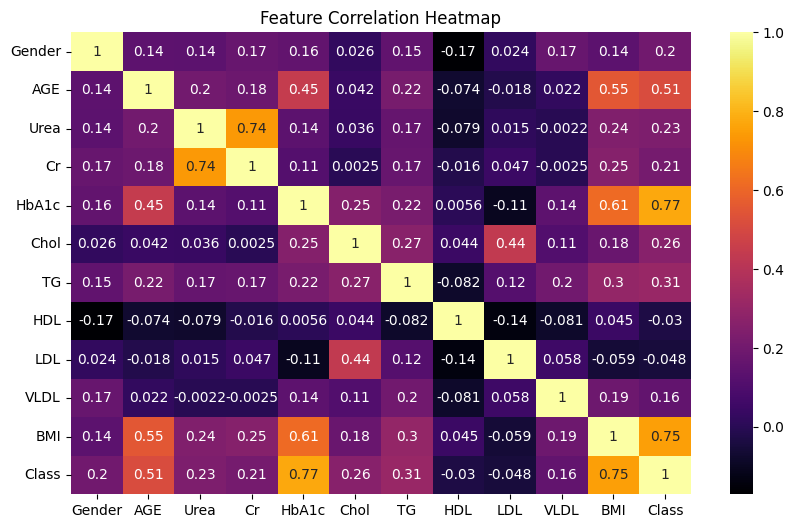

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="inferno")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X=df.drop(["Class"],axis=1)
y=df["Class"]
vif=pd.DataFrame({"features":X.columns,"VIF":[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]})
print("Variance Inflation Factor")
print(vif)
def accuracy_check(X,y,vif_df):
    St_features=vif_df.sort_values(by="VIF",ascending=False)['features'].tolist()
    result=[]
    for feature in St_features:
        if feature not in X.columns:
            continue
        X_temp=X.drop(columns=[feature])
        X_train,X_test,y_train,y_test=train_test_split(X_temp,y,test_size=0.2,random_state=42)
        sc=StandardScaler()
        X_train_sc=sc.fit_transform(X_train)
        X_test_sc=sc.transform(X_test)
        model=LogisticRegression(max_iter=1000)
        model.fit(X_train_sc, y_train)
        y_pred=model.predict(X_test_sc)
        acc=accuracy_score(y_test, y_pred)
        result.append((feature,acc))
    result_sorted=sorted(result,key=lambda x:x[1],reverse=True)

    for feature,acc in result_sorted:
        print(f"Removing {feature} → accuracy: {acc:.3f}")
accuracy_check(X,y,vif)


Variance Inflation Factor
   features        VIF
0    Gender   2.420556
1       AGE  33.497118
2      Urea   6.715845
3        Cr   3.936276
4     HbA1c  14.681083
5      Chol  19.633382
6        TG   4.750292
7       HDL   7.277413
8       LDL   9.586950
9      VLDL   1.367610
10      BMI  51.352213
Removing LDL → accuracy: 0.943
Removing HDL → accuracy: 0.925
Removing Urea → accuracy: 0.925
Removing TG → accuracy: 0.925
Removing Cr → accuracy: 0.925
Removing Gender → accuracy: 0.925
Removing VLDL → accuracy: 0.925
Removing AGE → accuracy: 0.906
Removing BMI → accuracy: 0.887
Removing Chol → accuracy: 0.887
Removing HbA1c → accuracy: 0.849


  Feature  Coefficient
2    Urea     0.292251
7     HDL     0.001095
1     AGE    -0.045943
8    VLDL    -0.085995
0  Gender    -0.117326
5    Chol    -0.356369
6      TG    -0.375458
3      Cr    -0.442578
9     BMI    -1.248597
4   HbA1c    -3.023385


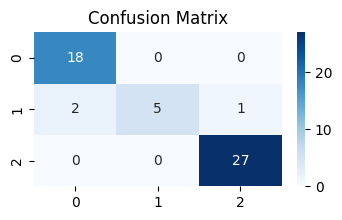

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.62      0.77         8
           2       0.96      1.00      0.98        27

    accuracy                           0.94        53
   macro avg       0.95      0.88      0.90        53
weighted avg       0.95      0.94      0.94        53

Accuracy: 0.9433962264150944


In [11]:
X=df.drop(["Class","LDL"],axis=1)
y=df["Class"]
sc=StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)
LR=LogisticRegression()
LR.fit(X_train_sc,y_train)
coeff=pd.DataFrame({"Feature": X.columns,"Coefficient": LR.coef_[0]})
coeff=coeff.sort_values(by="Coefficient",ascending=False)
print(coeff)
y_pred=LR.predict(X_test_sc)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))